##  Autoencoder

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Model
input_size = 28*28
output_size = input_size
hidden_units = 128
optimiser = Adadelta(learning_rate=10.0)
loss = 'mean_squared_error'
batch_size = 256
epochs = 20

In [3]:
input_layer = Input(shape=(input_size,))
# # Encoder part
encoded = Dense(hidden_units, activation='relu')(input_layer)
# Decoder part
decoded = Dense(output_size, activation='sigmoid')(encoded)

model = Model(inputs=input_layer, outputs=decoded)
model.compile(optimizer=optimiser, loss=loss)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
Total params: 201616 (787.56 KB)
Trainable params: 201616 (787.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
# Load the MNIST dataset
mnist_dataset = mnist.load_data()
(trainset, testset) = (mnist_dataset[0], mnist_dataset[1])
(X_train, y_train) = trainset
(X_test, y_test) = testset

# Preprocess data (convert to float and scale to between 0 and 1)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

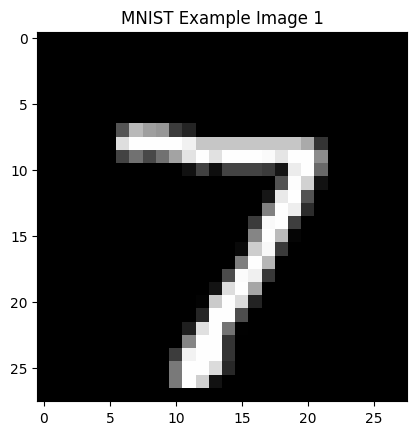

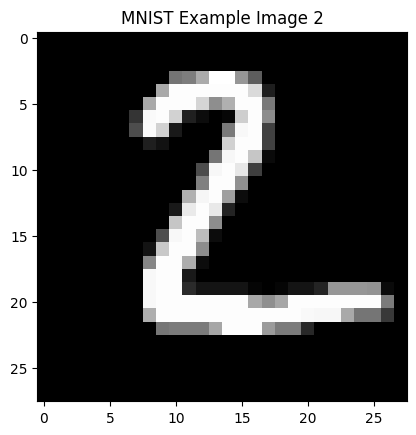

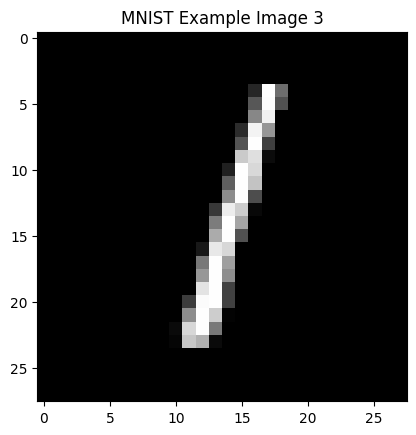

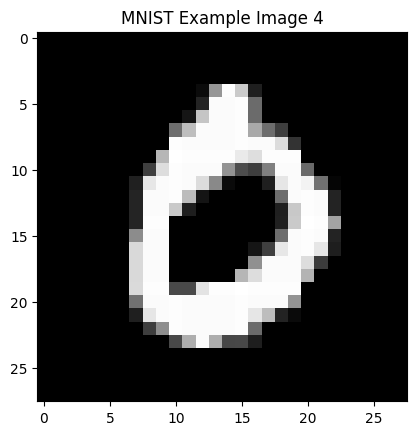

In [5]:
# Display the data
n_images = 4
for i in range(n_images):
    plt.imshow(X_test[i], cmap='gray')
    plt.title('MNIST Example Image ' + str(i + 1))
    plt.show()

In [6]:
# Flatten data (turn images into vectors)
X_train_fl = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test_fl = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

In [7]:
# Train the model
history = model.fit(
    X_train_fl, X_train_fl,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.0640 - val_loss: 0.0433
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0375 - val_loss: 0.0325
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0297 - val_loss: 0.0270
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0248 - val_loss: 0.0227
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0213 - val_loss: 0.0196
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0185 - val_loss: 0.0172
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 8/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 9/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 10/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0119 - val_loss: 0.0114

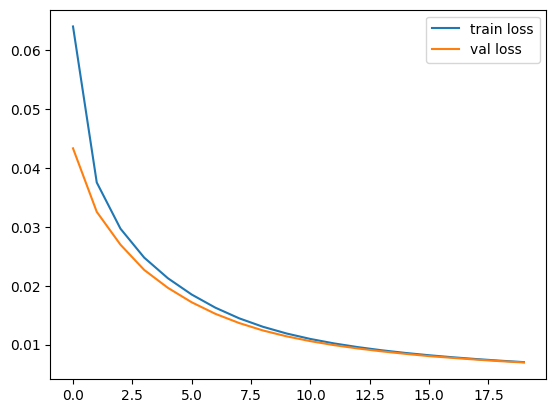

In [8]:
# Visualise the training process and result

# Plot losses
losses = history.history
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='val loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


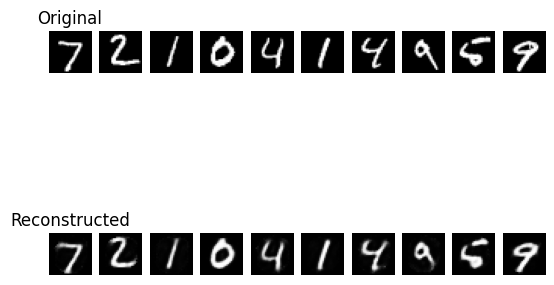

In [9]:
decoded_images = model.predict(X_test_fl)

# Display original and reconstructed images side-by-side
n_images = 10
for i in range(n_images):
    # Original image
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')
    
    # Reconstructed image
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Reconstructed')

plt.show()

 ## Stacked Autoencoder

In [10]:
from tensorflow.keras.optimizers.legacy import Adadelta

In [11]:
optimiser = Adadelta(learning_rate=10.0)

In [12]:
input_layer = Input(shape=(input_size,))

encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(output_size, activation='sigmoid')(decoded)

stacked_autoencoder = Model(inputs=input_layer, outputs=decoded)
stacked_autoencoder.compile(optimizer=optimiser, loss=loss)

In [13]:
history_sae = stacked_autoencoder.fit(
    X_train_fl, X_train_fl,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.0746 - val_loss: 0.0573
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0525 - val_loss: 0.0465
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0444 - val_loss: 0.0411
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0394 - val_loss: 0.0376
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0363 - val_loss: 0.0375
Epoch 6/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0339 - val_loss: 0.0324
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0316 - val_loss: 0.0307
Epoch 8/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0297 - val_loss: 0.0288
Epoch 9/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0283 - val_loss: 0.0262
Epoch 10/20
188/188 [==============================] - 1s 6ms/step - loss: 0.0271 - val_loss: 0.0274

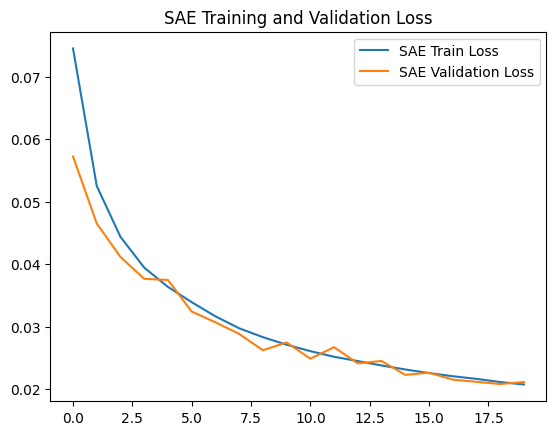

In [14]:
# Plot SAE losses
losses_sae = history_sae.history
plt.plot(losses_sae['loss'], label='SAE Train Loss')
plt.plot(losses_sae['val_loss'], label='SAE Validation Loss')
plt.legend()
plt.title('SAE Training and Validation Loss')
plt.show()

In [15]:
decoded_images_sae = stacked_autoencoder.predict(X_test_fl)

313/313 [==============================] - 1s 2ms/step


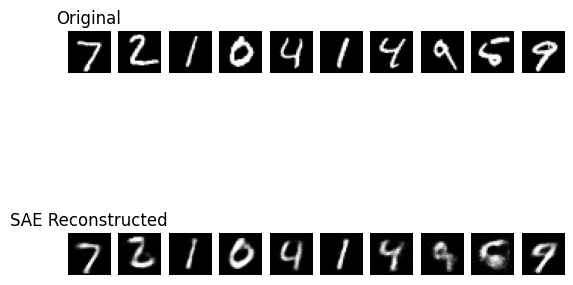

In [16]:
# Display original and SAE reconstructed images
n_images = 10
for i in range(n_images):
    # Original image
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')
    
    # SAE reconstructed image
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(decoded_images_sae[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('SAE Reconstructed')

##  Convolutional Autoencoder

In [17]:
X_train_cae = X_train[..., np.newaxis]
X_test_cae = X_test[..., np.newaxis]

In [18]:
optimiser_cae = Adadelta(learning_rate=1.0)

# Define Convolutional Autoencoder
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [19]:
convolutional_autoencoder = Model(inputs=input_layer, outputs=decoded)
convolutional_autoencoder.compile(optimizer=optimiser_cae, loss=loss)

In [20]:
history_cae = convolutional_autoencoder.fit(
    X_train_cae, X_train_cae,
    epochs=10,  
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/10
188/188 [==============================] - 26s 135ms/step - loss: 0.0528 - val_loss: 0.0241
Epoch 2/10
188/188 [==============================] - 25s 130ms/step - loss: 0.0207 - val_loss: 0.0172
Epoch 3/10
188/188 [==============================] - 24s 129ms/step - loss: 0.0163 - val_loss: 0.0151
Epoch 4/10
188/188 [==============================] - 27s 144ms/step - loss: 0.0138 - val_loss: 0.0124
Epoch 5/10
188/188 [==============================] - 26s 137ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 6/10
188/188 [==============================] - 26s 137ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 7/10
188/188 [==============================] - 26s 139ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 8/10
188/188 [==============================] - 26s 140ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 9/10
188/188 [==============================] - 30s 161ms/step - loss: 0.0097 - val_loss: 0.0101
Epoch 10/10
188/188 [==============================] - 26s 139ms/step - l

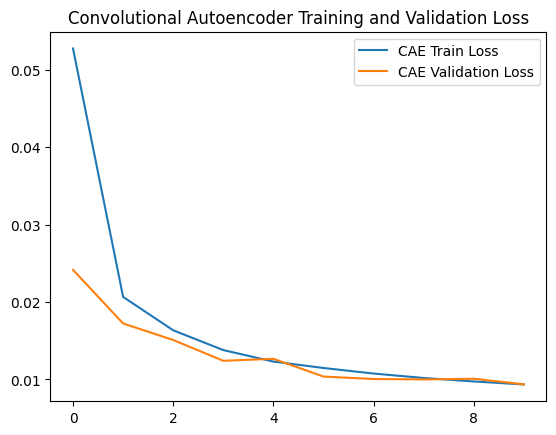

In [21]:
plt.plot(history_cae.history['loss'], label='CAE Train Loss')
plt.plot(history_cae.history['val_loss'], label='CAE Validation Loss')
plt.legend()
plt.title('Convolutional Autoencoder Training and Validation Loss')
plt.show()

313/313 [==============================] - 2s 8ms/step


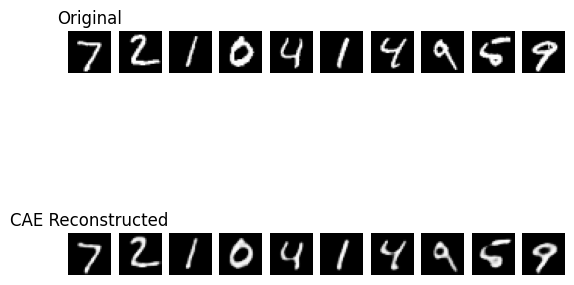

In [22]:
decoded_images_cae = convolutional_autoencoder.predict(X_test_cae)

for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')
    
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(decoded_images_cae[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('CAE Reconstructed')

plt.show()